In [ ]:
"""
Example of how to get the ground truth data for a DIC microscopy image

It includes:
CellTopology, CellInstance, CellSemantic (binary), DIC with cell contours
"""

In [1]:
from cellpose import models, io
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as skio
from scipy.ndimage import distance_transform_edt

model = models.Cellpose(gpu=False, model_type='cyto')

image_path = r'E:\Data_sets\ISL_Cell_Seg\tiff\TWDIC3_w4Cy5_s1.TIF'
image = skio.imread(image_path)

channels = [0,0] # Grayscale
masks, flows, styles, diams = model.eval([image], diameter=None, channels=channels, flow_threshold=None, cellprob_threshold=0.5)

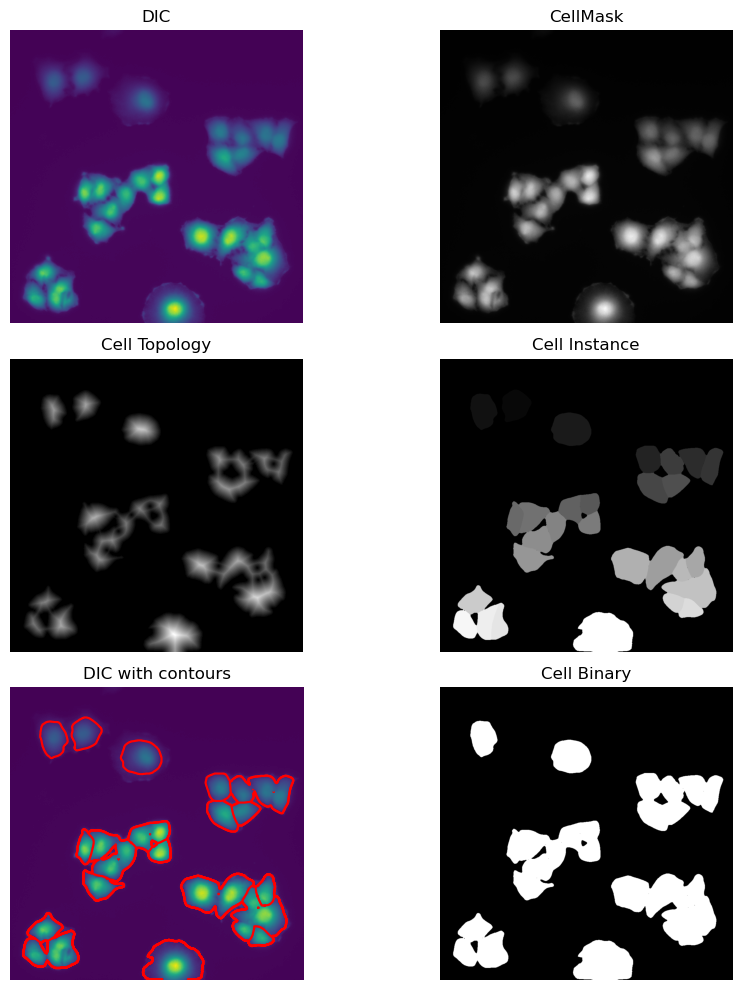

In [2]:

image_orig = r'E:\Data_sets\ISL_Cell_Seg\tiff\TWDIC3_w5DIC-oil-40x_s1.TIF'
image_orig = skio.imread(image_path)

# Distance transform for topology
dist_transform = distance_transform_edt(masks[0])

# Invert the distance map so that the center of the cells is bright and normalize in range [0, 1]
inverted_dist_transform = np.max(dist_transform) - dist_transform
inverted_dist_transform_normalized = inverted_dist_transform / np.max(inverted_dist_transform)

fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # 2 rows, 2 columns

# [0,0]
ax1 = axs[0, 0]
ax1.imshow(image_orig[0])
ax1.set_title('DIC')
ax1.axis('off')

# [0,1]
ax2 = axs[0, 1]
ax2.imshow(image[0], cmap='gray')
ax2.set_title('CellMask')
ax2.axis('off')

# [1,0]
ax3 = axs[1, 0]
ax3.imshow(inverted_dist_transform_normalized, cmap='gray_r')
ax3.set_title('Cell Topology')
ax3.axis('off')

# [1,1]
ax4 = axs[1, 1]
ax4.imshow(masks[0], cmap='binary_r')
ax4.set_title('Cell Instance')
ax4.axis('off')

# [2,0]
ax5 = axs[2, 0]
ax5.imshow(image_orig[0])
ax5.contour(masks[0], colors='r')
ax5.set_title('DIC with contours')
ax5.axis('off')

# [2,1]
ax6 = axs[2, 1]
mask_bin = masks[0] > 1
ax6.imshow(mask_bin, cmap='binary_r')
ax6.set_title('Cell Binary')
ax6.axis('off')

plt.tight_layout()

plt.savefig(r'C:\Users\Marcel\OneDrive\Thesis\ISL/all_cell_plots.png')
plt.show()